In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings 
warnings.filterwarnings ('ignore')

In [3]:
df= pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [8]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [9]:
df.shape

(1338, 7)

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [44]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [15]:
ohe=OneHotEncoder()
si = SimpleImputer()

In [39]:
ct= make_column_transformer((ohe, ['sex', 'smoker', 'region']), remainder= 'passthrough')


In [40]:
encoded= pd.DataFrame(ct.fit_transform(df))
encoded

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0,10600.54830
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0,2205.98080
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0,1629.83350
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0,2007.94500


In [42]:
encoded= pd.DataFrame(ct.fit_transform(df), columns=['sex_female','sex_male','smoker_no','smoker_yes','region_northeast','region_northwest', 'region_southeast', 'region_southwest','age','bmi','children','charges'])

In [43]:
encoded

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0,10600.54830
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0,2205.98080
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0,1629.83350
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0,2007.94500


In [29]:
ct.fit(df)
print(ct.get_feature_names_out(input_features=df.columns))


['onehotencoder__sex_female' 'onehotencoder__sex_male'
 'onehotencoder__smoker_no' 'onehotencoder__smoker_yes'
 'onehotencoder__region_northeast' 'onehotencoder__region_northwest'
 'onehotencoder__region_southeast' 'onehotencoder__region_southwest'
 'remainder__age' 'remainder__bmi' 'remainder__children'
 'remainder__charges']


In [47]:
encoded.dtypes

sex_female          float64
sex_male            float64
smoker_no           float64
smoker_yes          float64
region_northeast    float64
region_northwest    float64
region_southeast    float64
region_southwest    float64
age                 float64
bmi                 float64
children            float64
charges             float64
dtype: object

In [48]:
df=encoded

In [51]:
df.duplicated().sum()

1

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.duplicated().sum()

0

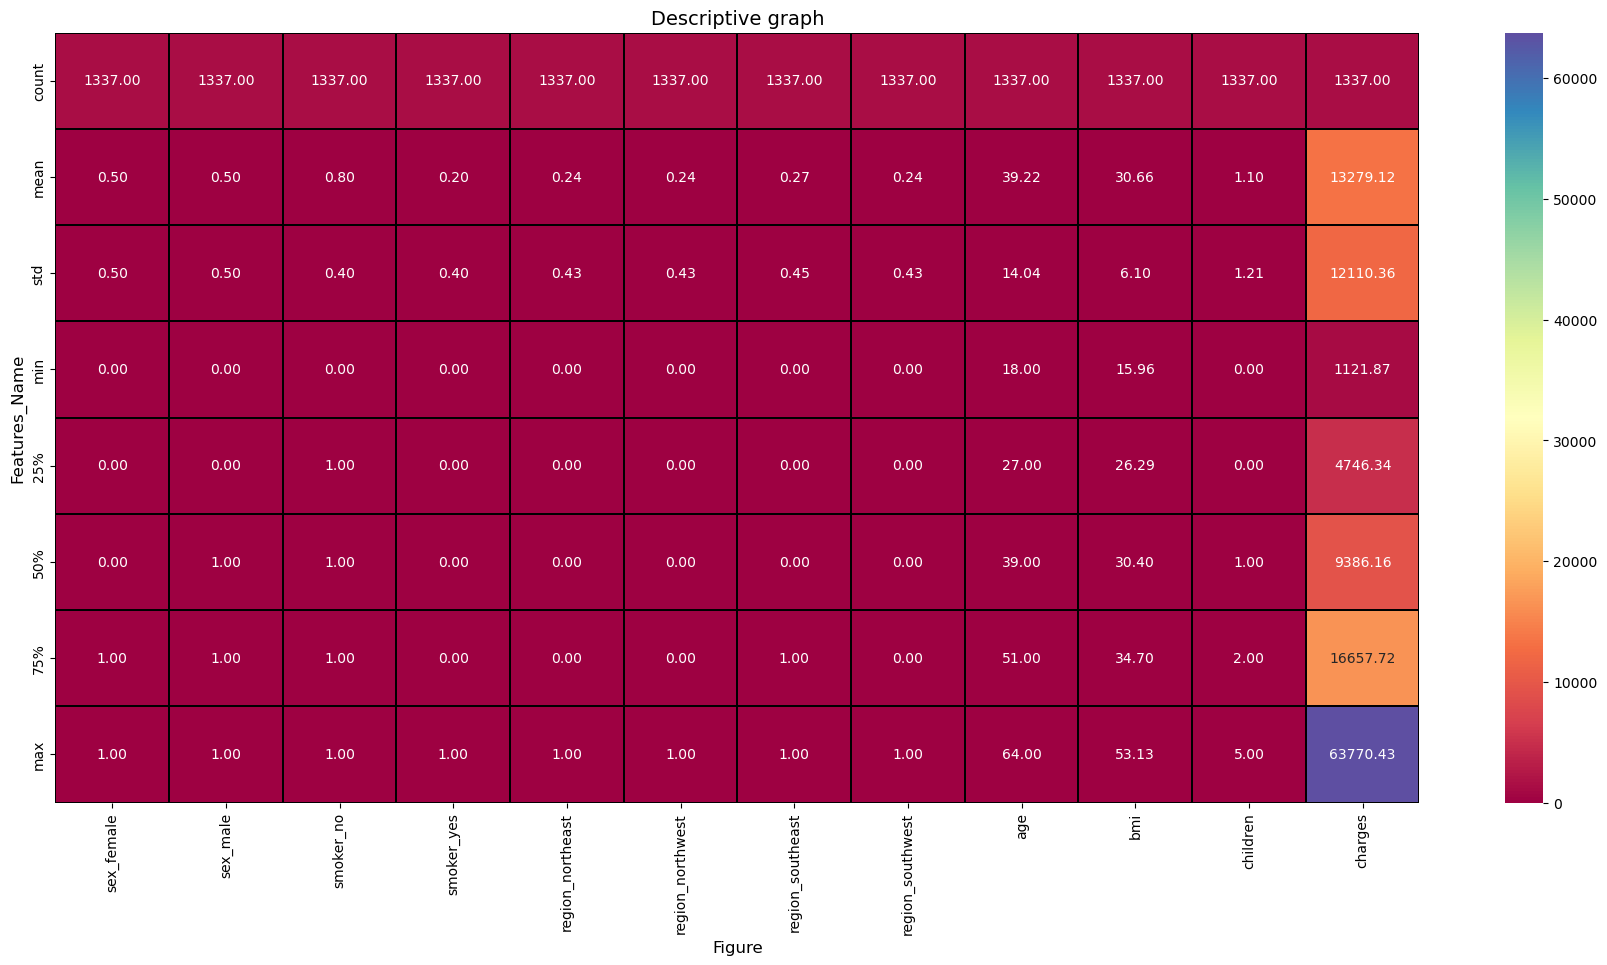

In [57]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(), annot=True,fmt='0.2f' ,linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure' , fontsize=12)
plt.ylabel('Features_Name', fontsize=12)
plt.title('Descriptive graph', fontsize=14)
plt.show()

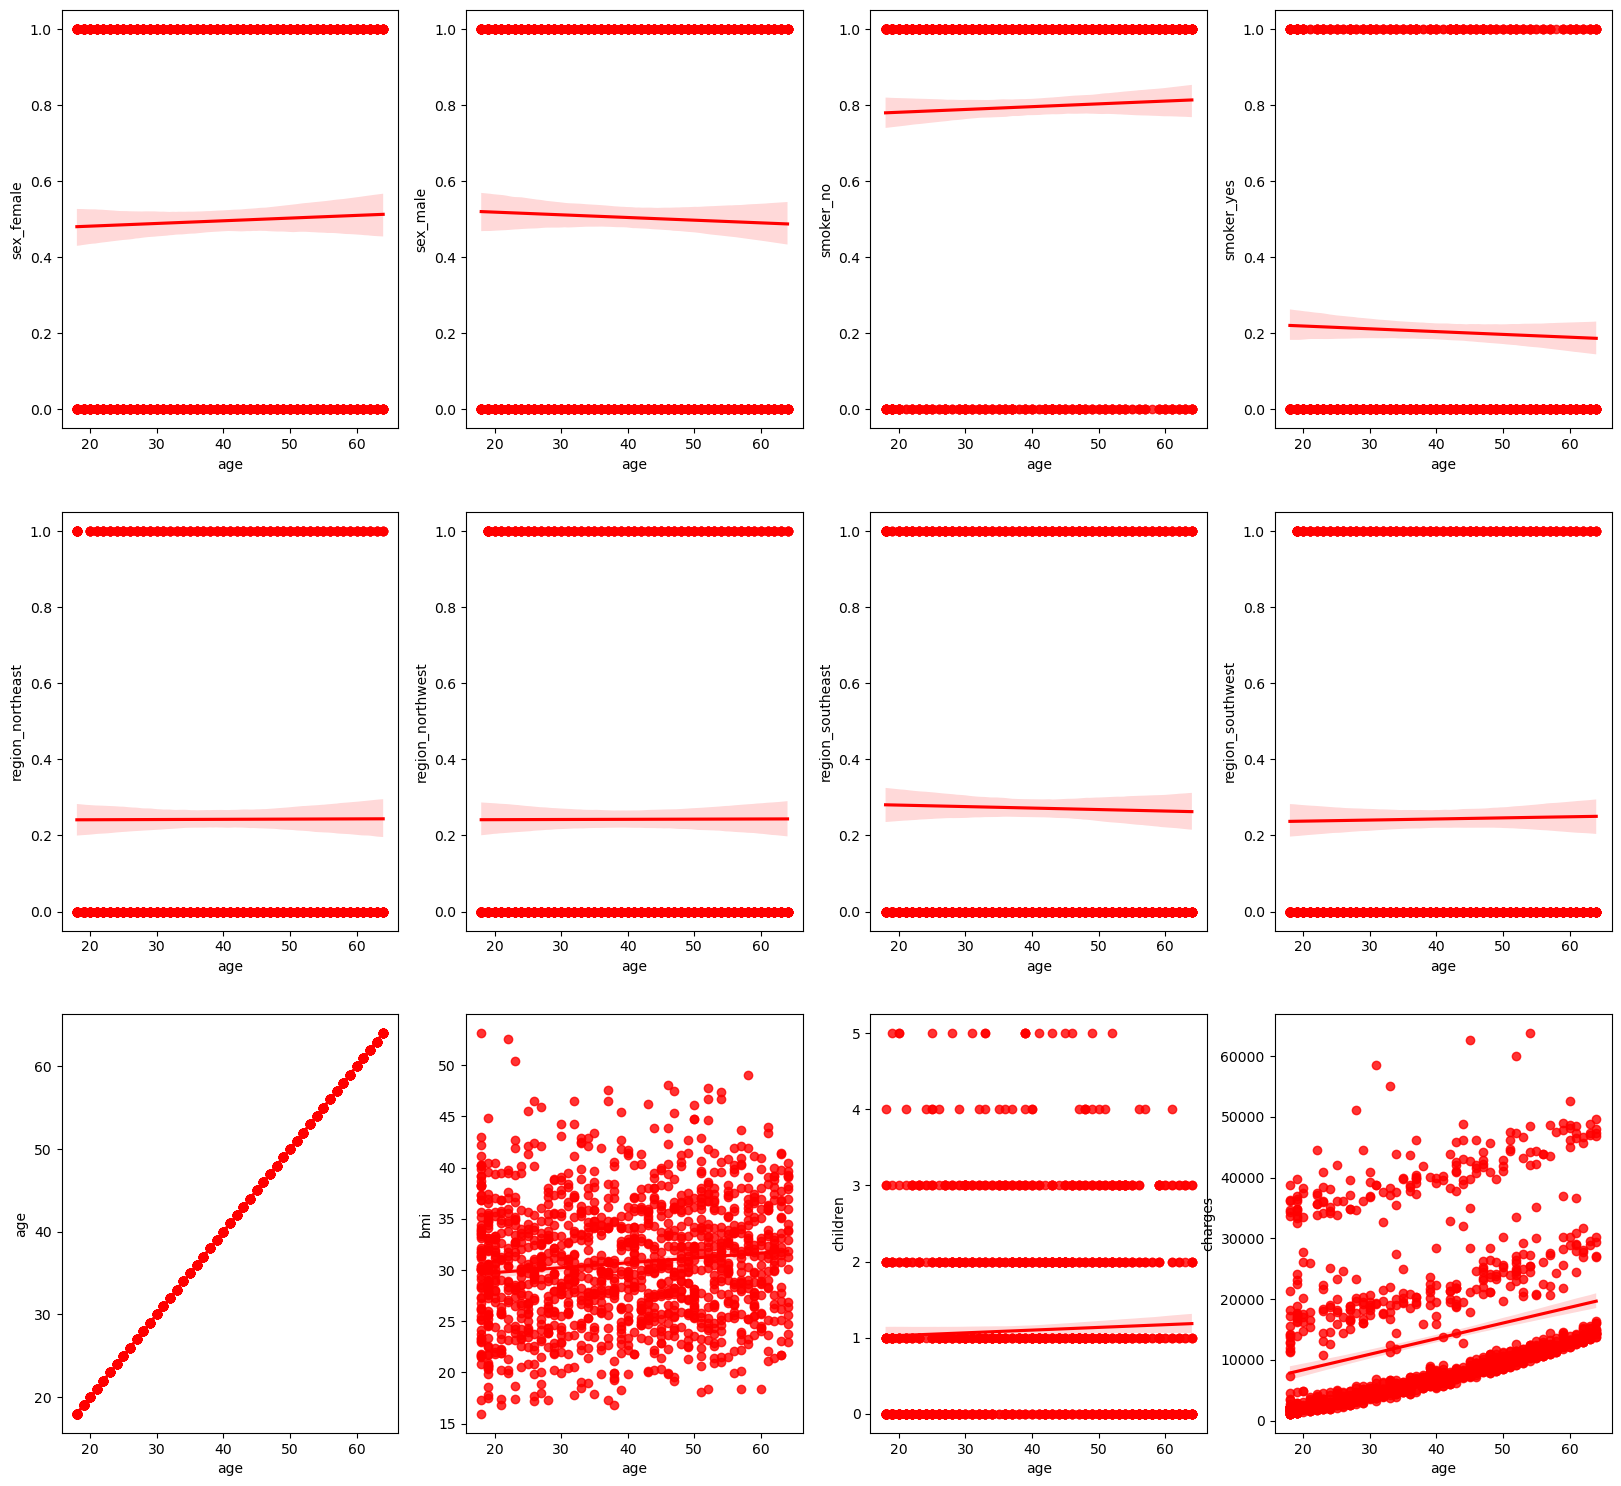

In [67]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<= 13:
        plt.subplot(4,4,p)
        sns.regplot(x='age', y=i, data=df, color='r')
        plt.xlabel('age')
        plt.ylabel (i)
    p+=1
plt.show()

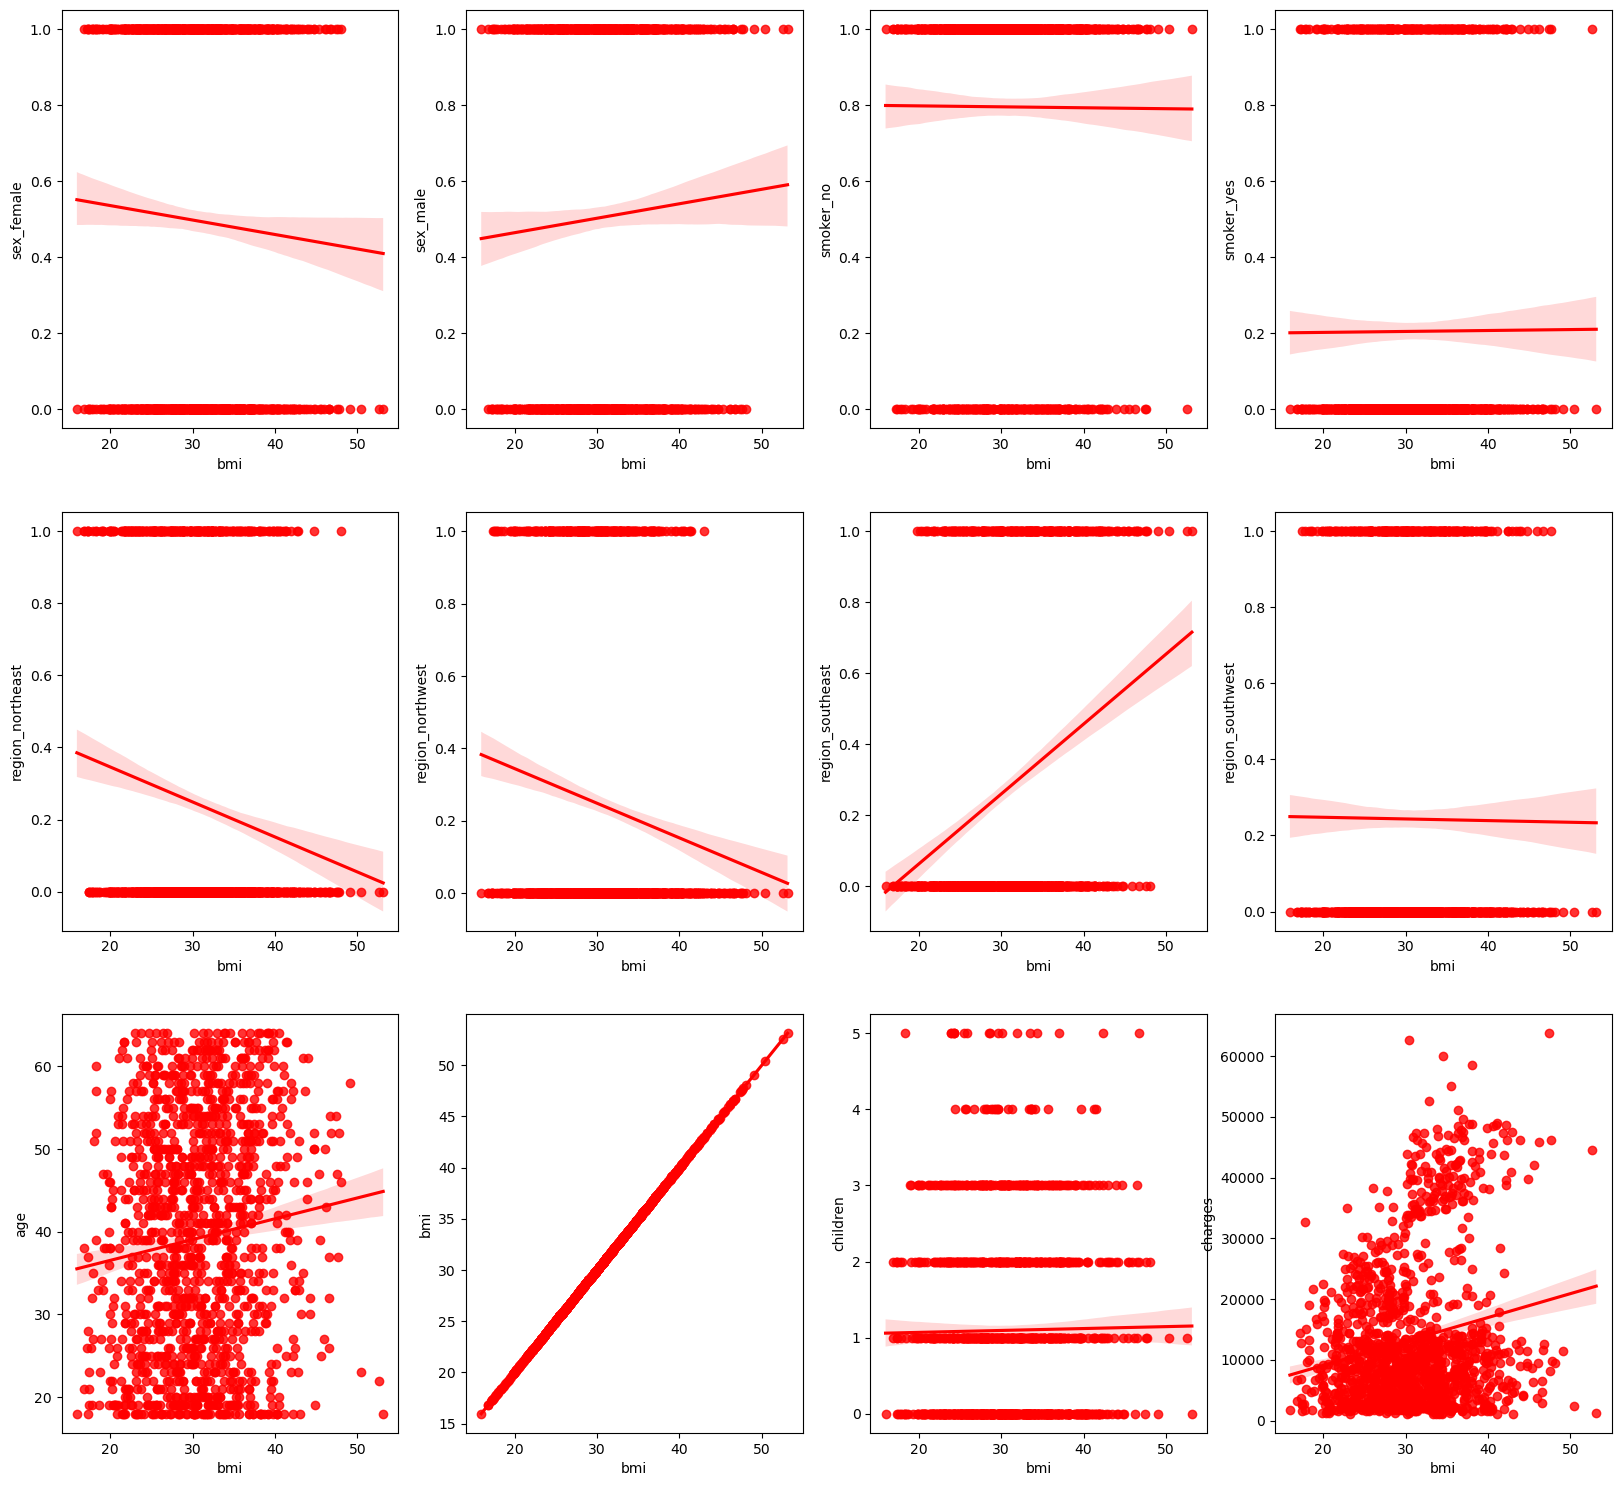

In [68]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<= 13:
        plt.subplot(4,4,p)
        sns.regplot(x='bmi', y=i, data=df, color='r')
        plt.xlabel('bmi')
        plt.ylabel (i)
    p+=1
plt.show()

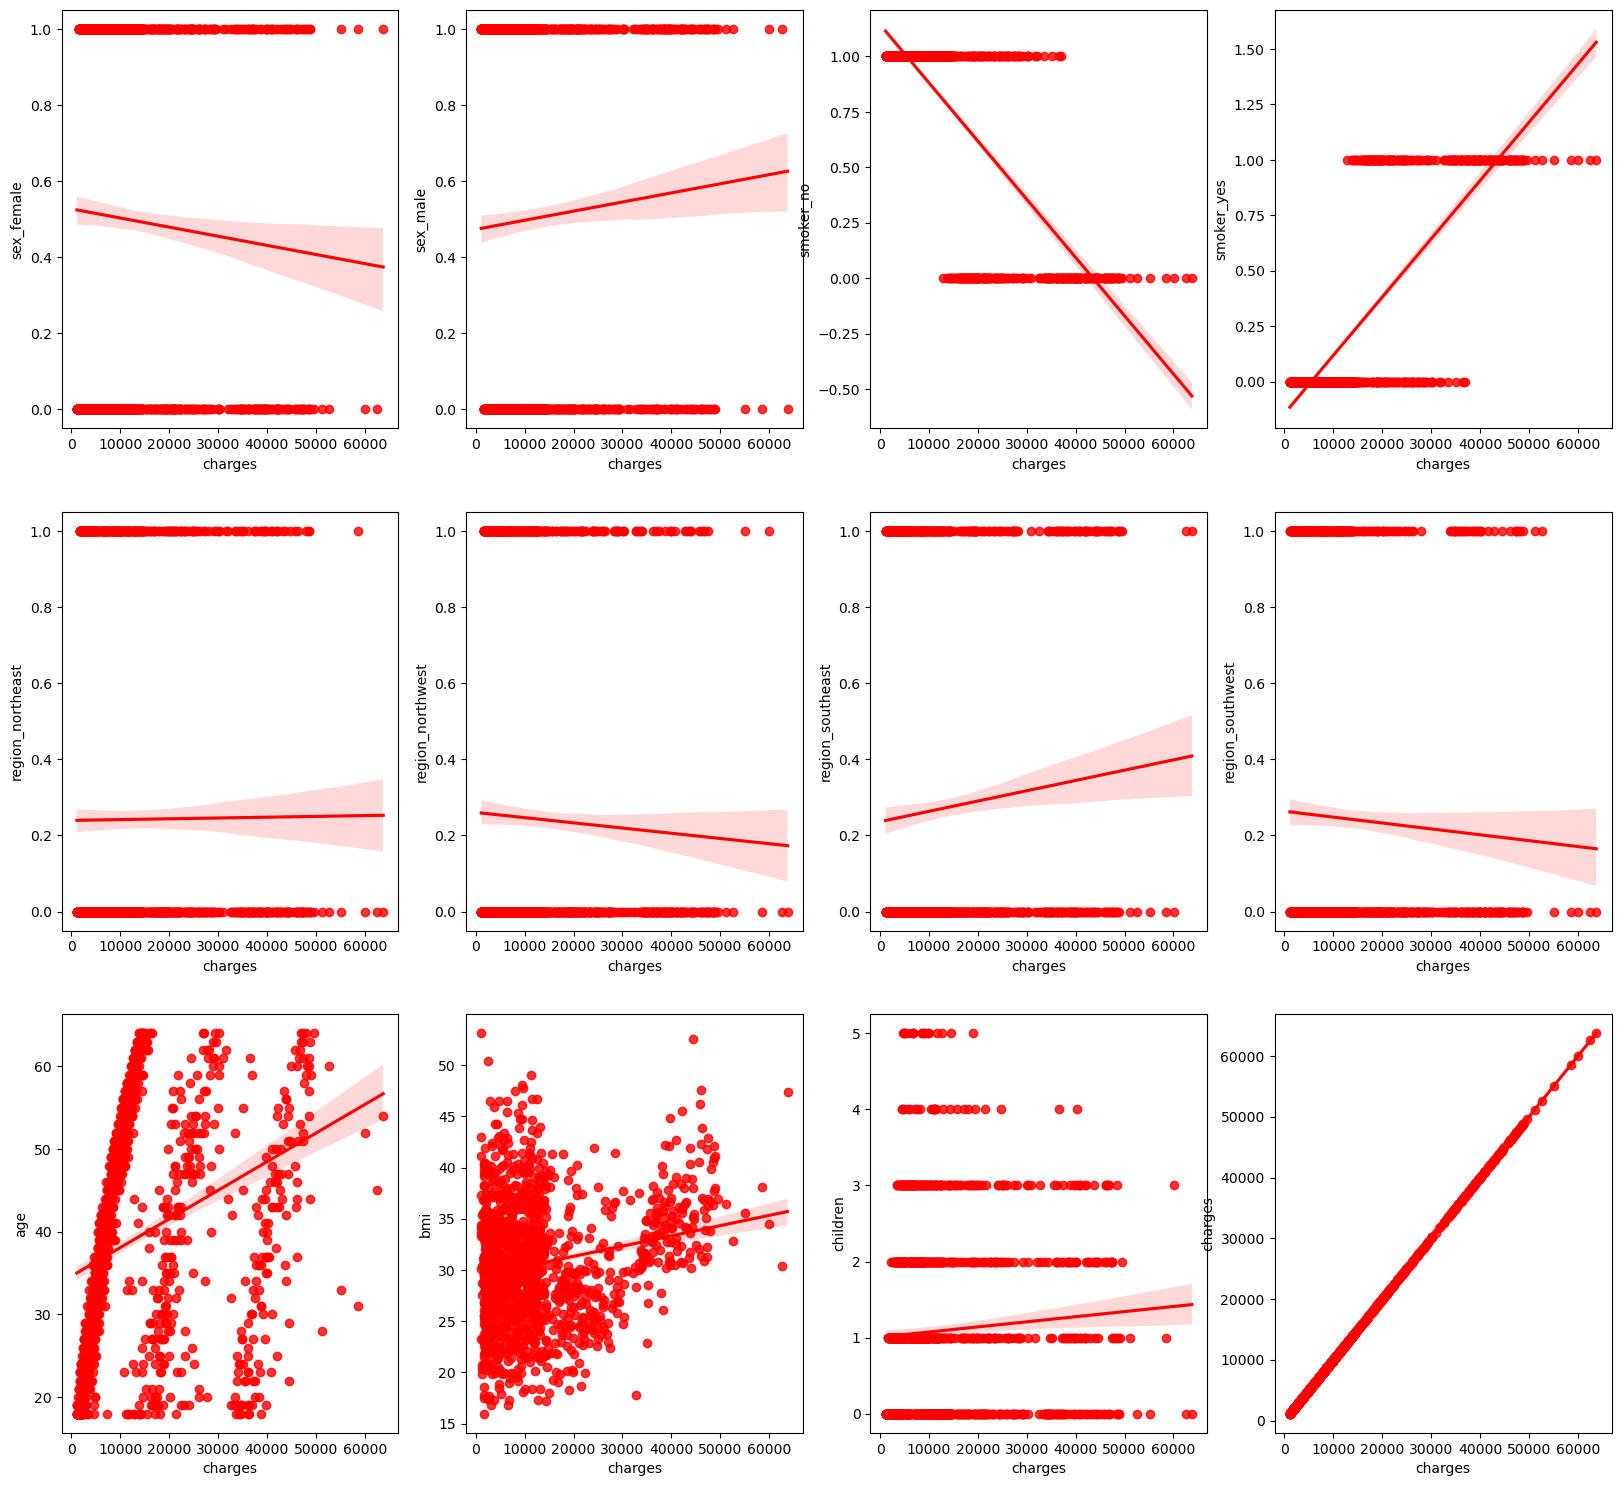

In [69]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<= 13:
        plt.subplot(4,4,p)
        sns.regplot(x='charges', y=i, data=df, color='r')
        plt.xlabel('charges')
        plt.ylabel (i)
    p+=1
plt.show()

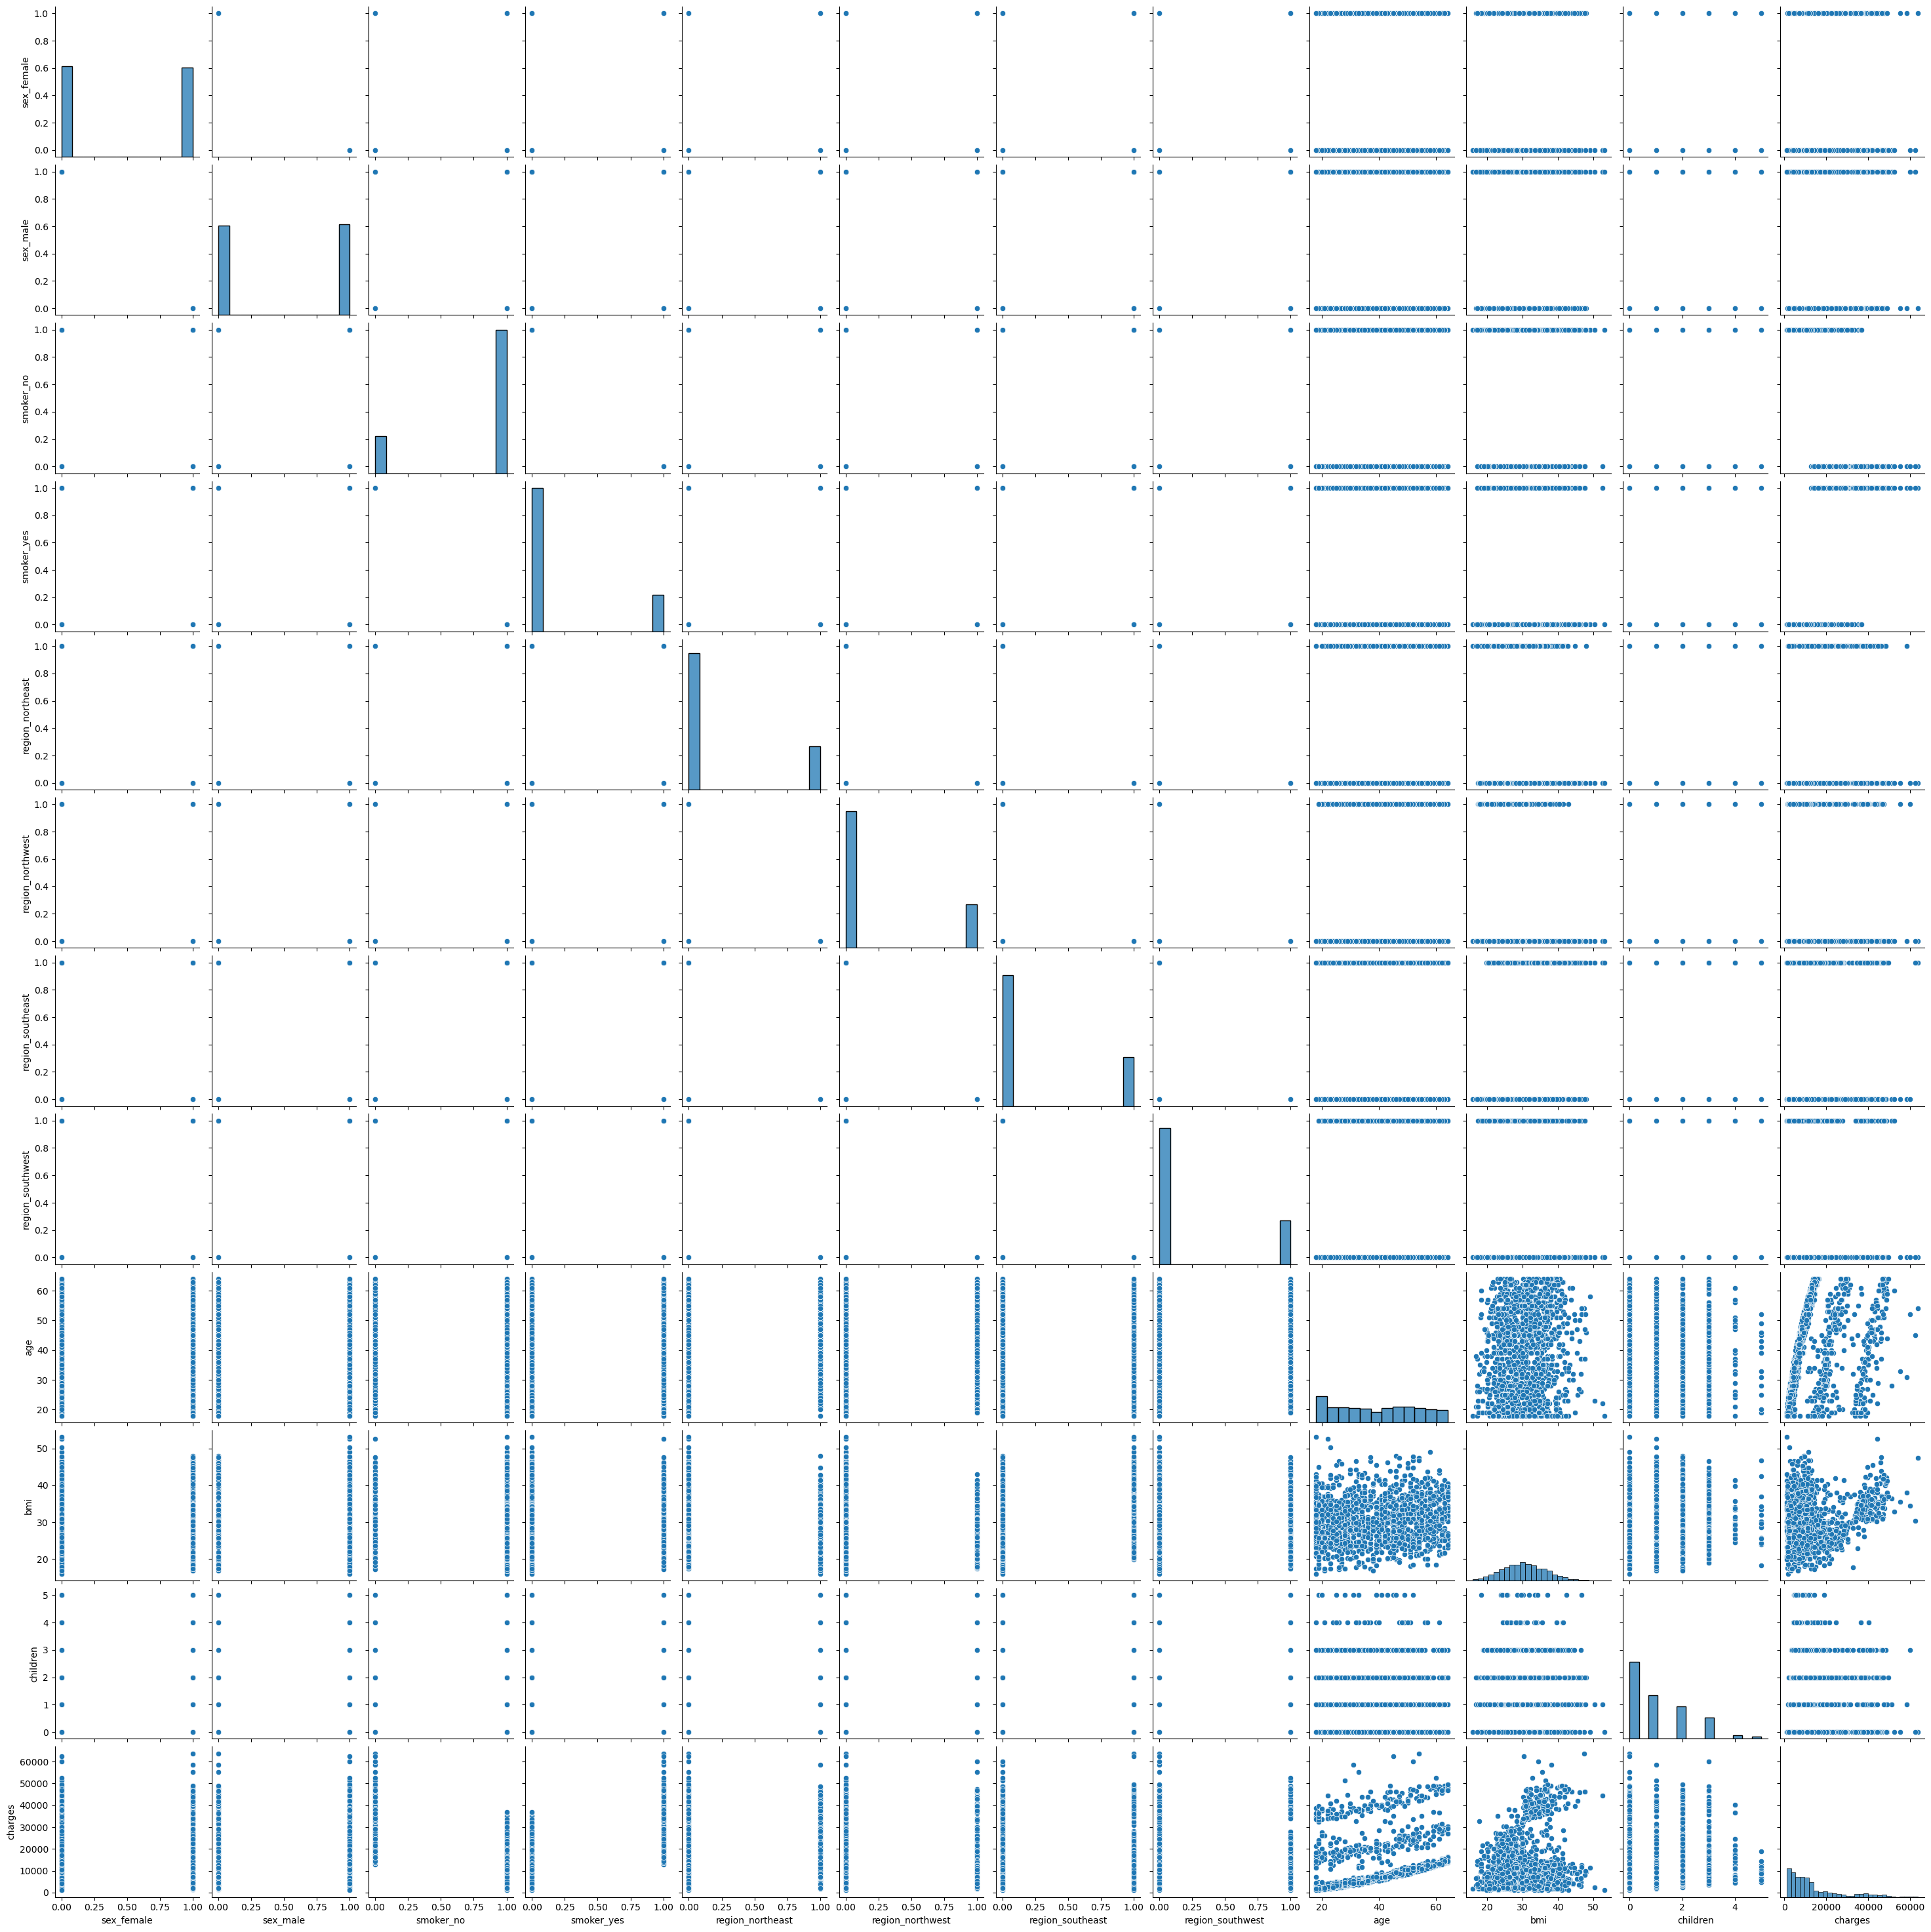

In [71]:
sns.pairplot(data=df, palette= 'dark2')

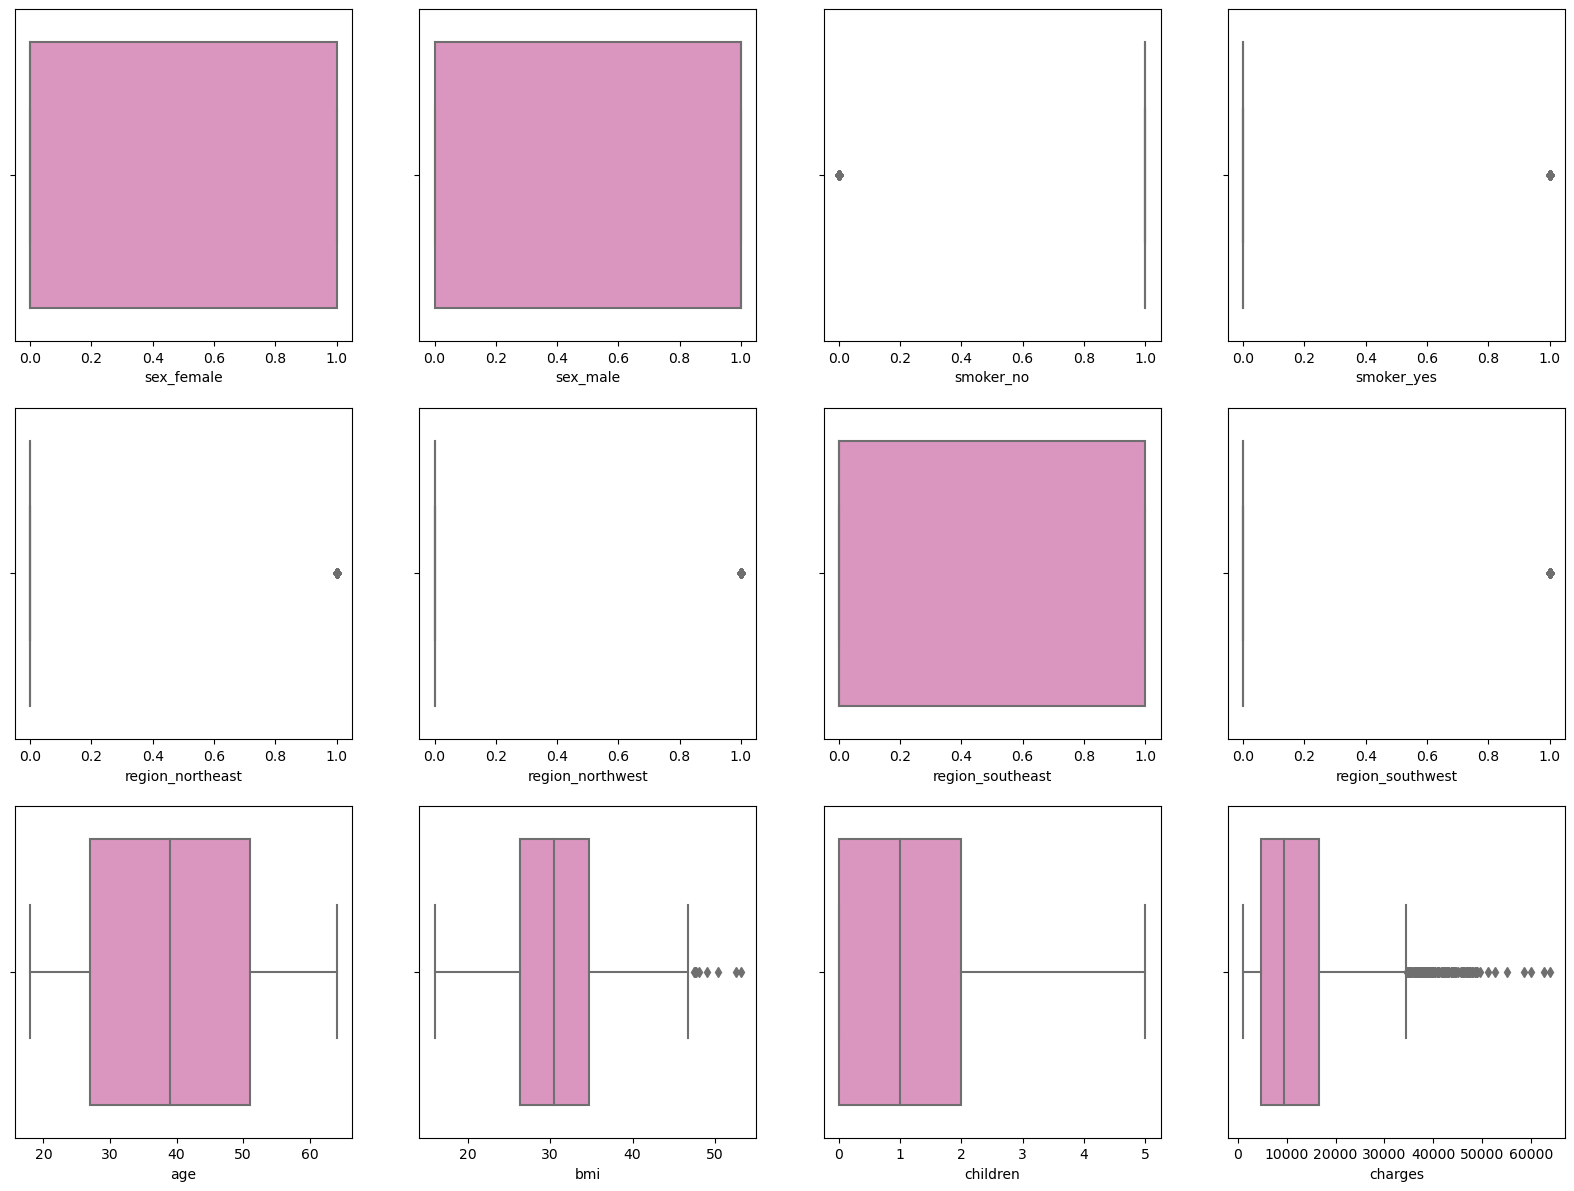

In [75]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette='Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()

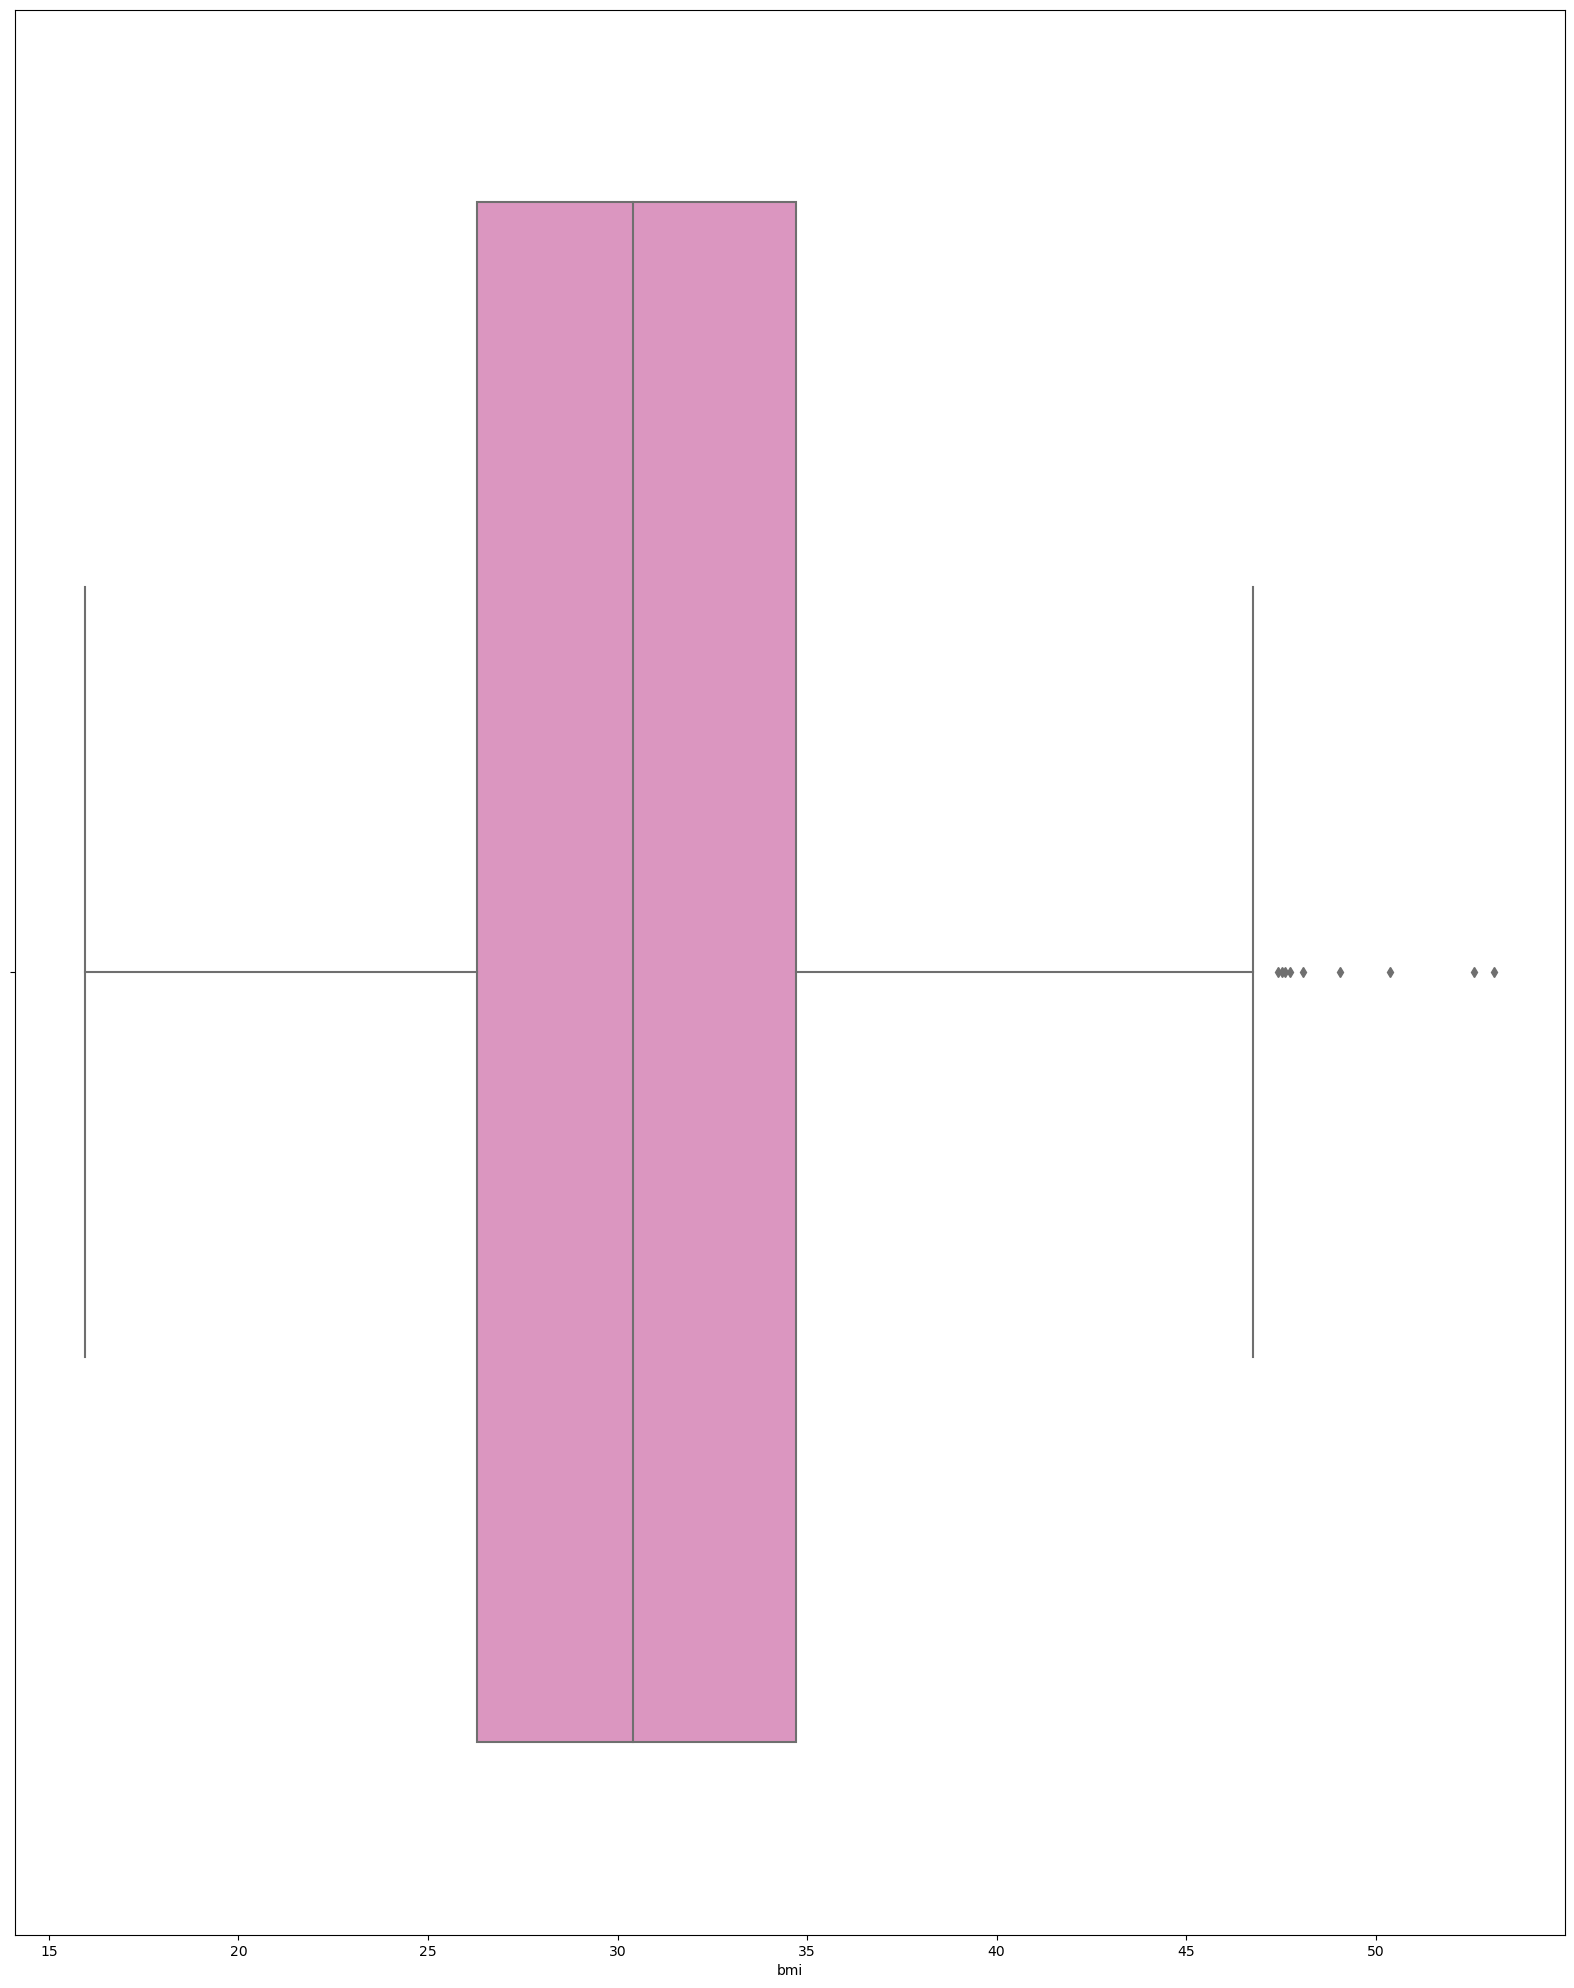

In [78]:
plt.figure(figsize=(20,25))
sns.boxplot(df['bmi'], palette='Set2_r')
plt.show()

In [79]:
from scipy.stats import zscore
out_features=df[['bmi']]
z=np.abs(zscore(out_features))
z

,bmi
0,0.453160
1,0.509422
2,0.383155
3,1.305052
4,0.292456
...,...
1333,0.050269
1334,0.206053
1335,1.014490
1336,0.797524


In [96]:
from scipy.stats import zscore
out_features=df[['charges']]
z=np.abs(zscore(out_features))
z

,charges
0,0.305500
1,0.958515
2,0.731390
3,0.730710
4,0.779969
...,...
1333,0.218502
1334,0.918456
1335,0.966496
1336,0.934968


In [97]:
np.where(z>3)

(array([  34,  573,  814, 1137, 1221, 1232, 1291], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [98]:
df1=df[(z<3).all(axis=1)]
df1.shape

(1321, 12)

In [99]:
q1=out_features.quantile(0.25)
q3=out_features.quantile(0.75)
iqr=q3-q1
df2=df1[~((df1 <(q1 - 1.5 * iqr)) |(df1> (q3 + 1.5 * iqr))).any(axis=1)]

In [100]:
df2.shape

(1190, 12)

In [102]:
df=df2

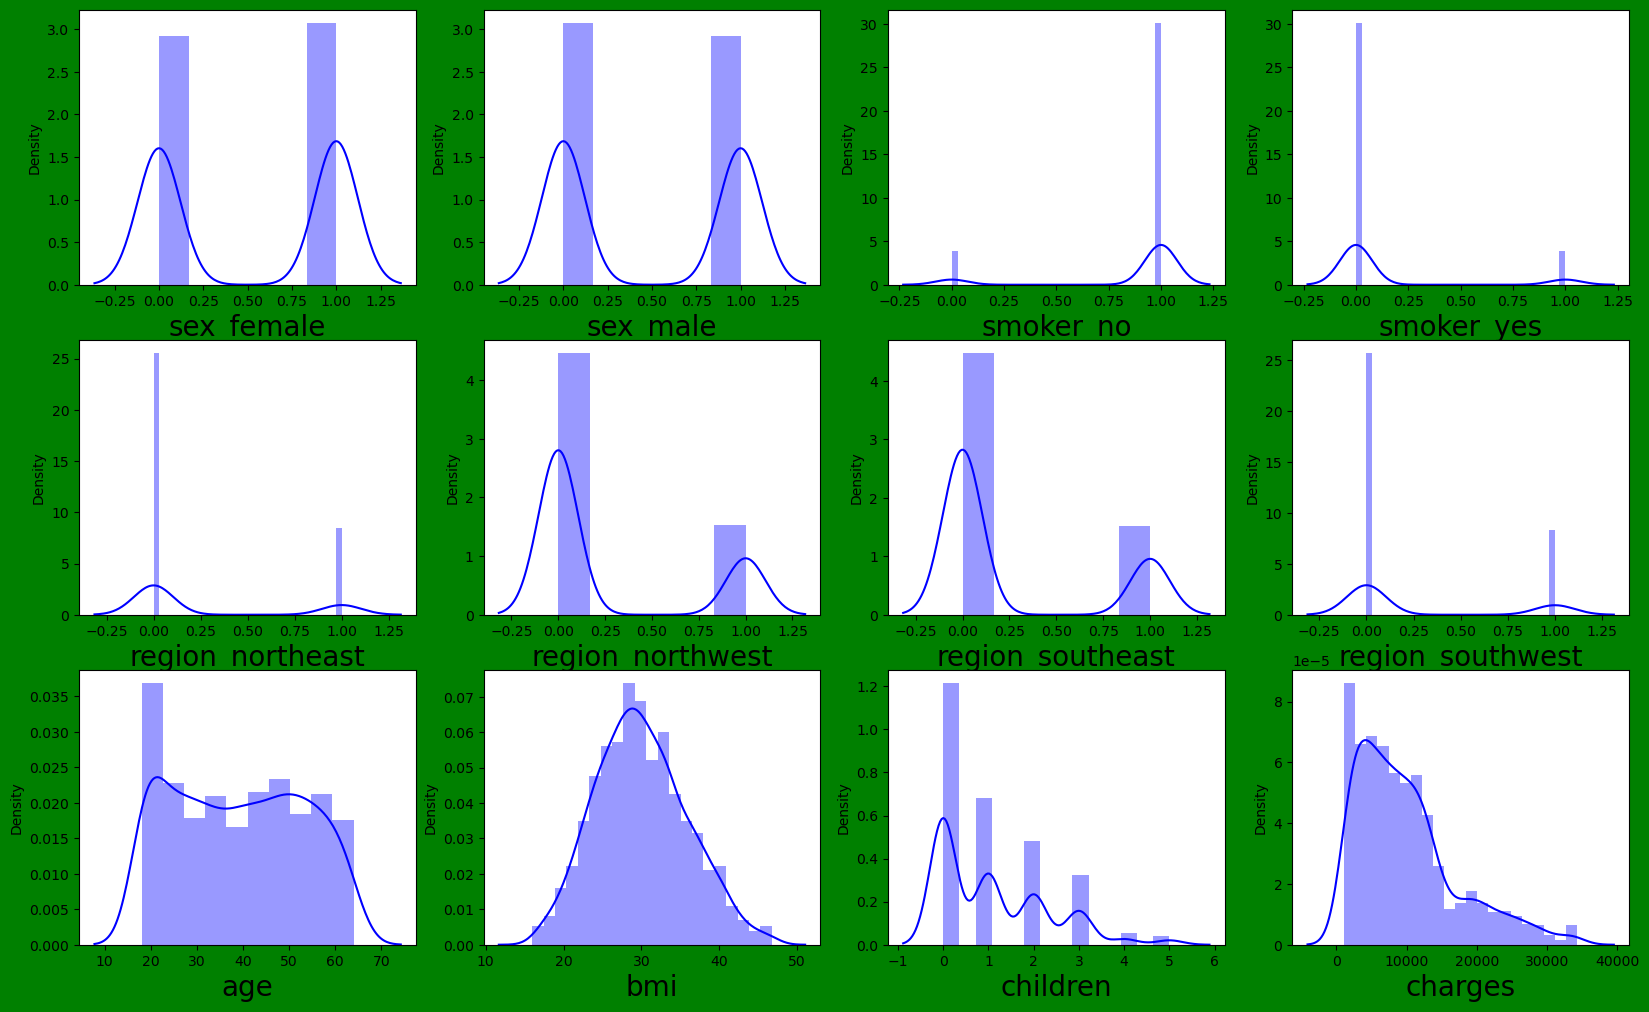

In [103]:
plt.figure(figsize=(20, 25), facecolor='green')
plotnumber=1

for column in df:
    if plotnumber<=13:
        ax = plt.subplot (6,4,plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()
        

In [106]:
df.corr()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
sex_female,1.000000,-1.000000,0.014343,-0.014343,-0.004744,-0.003207,0.002730,0.005265,0.020240,-0.016407,-0.016346,0.021925
sex_male,-1.000000,1.000000,-0.014343,0.014343,0.004744,0.003207,-0.002730,-0.005265,-0.020240,0.016407,0.016346,-0.021925
smoker_no,0.014343,-0.014343,1.000000,-1.000000,-0.032332,-0.019726,0.002430,0.050097,0.062581,0.260642,0.002172,-0.596230
smoker_yes,-0.014343,0.014343,-1.000000,1.000000,0.032332,0.019726,-0.002430,-0.050097,-0.062581,-0.260642,-0.002172,0.596230
region_northeast,-0.004744,0.004744,-0.032332,0.032332,1.000000,-0.336294,-0.334066,-0.325895,0.000806,-0.132324,-0.024053,0.066546
region_northwest,-0.003207,0.003207,-0.019726,0.019726,-0.336294,1.000000,-0.340841,-0.332505,-0.000196,-0.112566,0.012956,0.039487
region_southeast,0.002730,-0.002730,0.002430,-0.002430,-0.334066,-0.340841,1.000000,-0.330301,-0.016840,0.230877,-0.015196,-0.029676
region_southwest,0.005265,-0.005265,0.050097,-0.050097,-0.325895,-0.332505,-0.330301,1.000000,0.016440,0.013666,0.026417,-0.076996
age,0.020240,-0.020240,0.062581,-0.062581,0.000806,-0.000196,-0.016840,0.016440,1.000000,0.124055,0.037153,0.448052
bmi,-0.016407,0.016407,0.260642,-0.260642,-0.132324,-0.112566,0.230877,0.013666,0.124055,1.000000,0.007625,-0.064421


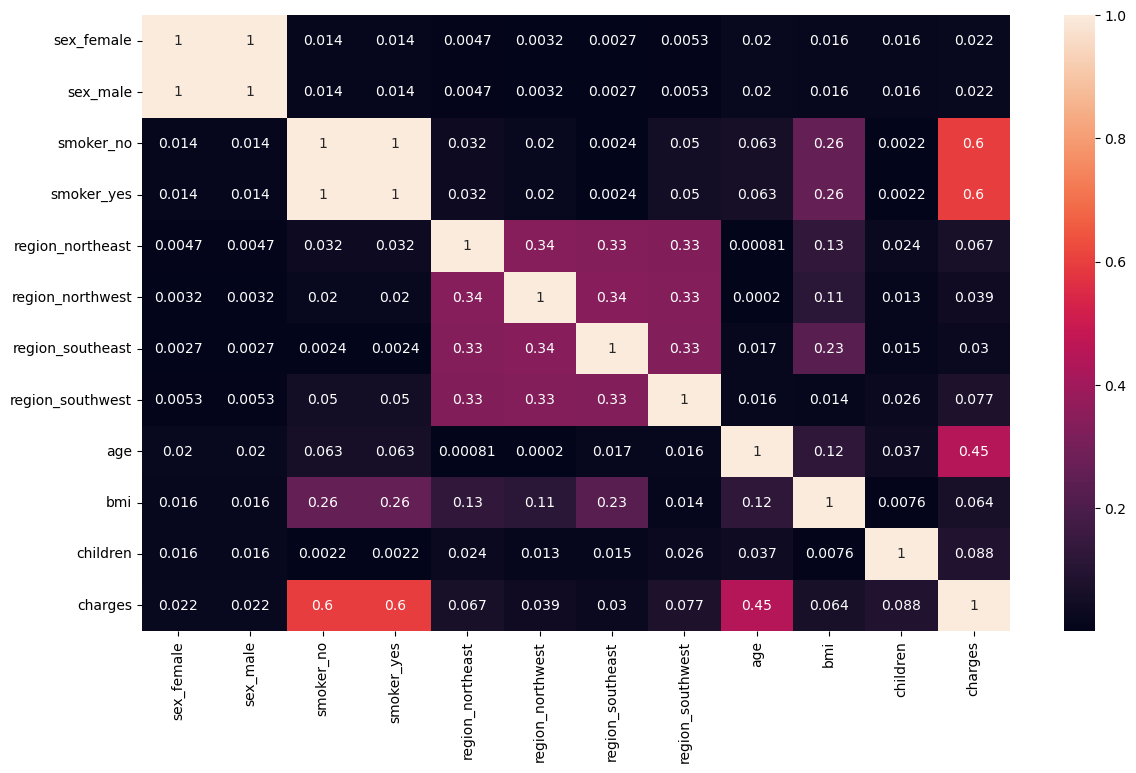

In [108]:
df_corr= df.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

In [113]:
from sklearn.preprocessing import StandardScaler
x=df
scaler= StandardScaler()
x_scaled=scaler.fit_transform(x)

In [114]:
x_scaled.shape[1]

12

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.267315e+04,sex_female
1,1.343092e+05,sex_male
2,2.257510e+06,smoker_no
3,1.918343e+06,smoker_yes
4,inf,region_northeast
5,inf,region_northwest
6,inf,region_southeast
7,inf,region_southwest
8,1.599111e+00,age
9,1.169489e+00,bmi


In [122]:
x= df.drop (columns= ['charges'])
y= df ['charges']

In [145]:
x_train, x_test, y_train, y_test =train_test_split (x_scaled,y, test_size =0.25, random_state= 41)
y_train.head()

358      1837.28190
1328    22395.74424
684      4766.02200
245     24476.47851
1324     4239.89265
Name: charges, dtype: float64

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [147]:
pred_train=rf.predict(x_train)
pred=rf.predict(x_test)
r2=r2_score(y_test, pred)
print ('R2=:',r2)

R2=: 0.9999773725248956


In [148]:
print('R2 score on training data:',r2_score(y_train, pred_train)*100 )
print('Mean absolute error:',mean_absolute_error(y_test, pred) )
print('Mean squared error:',mean_squared_error(y_test, pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred)))

R2 score on training data: 99.99867603824998
Mean absolute error: 17.288465298658142
Mean squared error: 939.8547510608578
Root mean squared error: 30.657050592985257


In [150]:
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

In [151]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)


In [152]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [154]:
grid_search.best_params_

{'max_depth': 30, 'n_estimators': 50}

In [159]:
rf = RandomForestRegressor(n_estimators=50, max_depth=30)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=50)